In [11]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft
from scipy import signal

import warnings
warnings.filterwarnings("ignore")

In [2]:
def gaussian(t, sd):
    return np.exp( (-1 * (t**2) ) / (2 * sd**2))


def fourier(sig, fs):
    sigX = fft(sig) / len(sig)
    ff = fftfreq(len(sig), 1/fs)
    return sigX[ff >= 0], ff[ff >= 0]


def complex_sine(t, f):
    return np.exp(1j * 2 * np.pi * f * t)

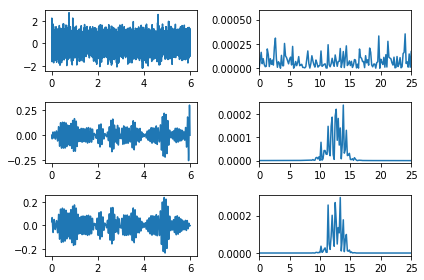

In [3]:
f = '/home/ruairi/Documents/mikex/wavelet_codeChallenge.mat'

data = loadmat(f)

sig = data['signal'].flatten()
fir = data['signalFIR'].flatten()
sig_wavelet = data['signalMW'].flatten()
fs = data['srate'][0][0]
t = np.arange(0, len(sig)) / fs

sigX, sigF = fourier(sig, fs)
firX, firF = fourier(fir, fs)
waveX, waveF = fourier(sig_wavelet, fs)

f, a = plt.subplots(3, 2)
a[0, 0].plot(t, sig)
a[0, 1].plot(sigF, np.abs(sigX)**2)
a[1, 0].plot(t, fir)
a[1, 1].plot(firF, np.abs(firX)**2)
a[2, 0].plot(t, sig_wavelet)
a[2, 1].plot(waveF, np.abs(waveX)**2)

a[0, 1].set_xlim([0, 25])
a[1, 1].set_xlim([0, 25])
a[2, 1].set_xlim([0, 25])
f.tight_layout()

#### wavelet at 12.5 Hz

In [4]:
f = 12.5
wave_cycles = 10
wave_time = np.arange(-2, 2 + 1/fs, 1/fs)

# gaussian
sd = wave_cycles / ( 2 * np.pi * f)
gaus = np.array(list(map(lambda x: gaussian(x, sd=sd), wave_time)))

# complex sine
complex_sine = np.array(list(map(lambda x: complex_sine(x, f=f), wave_time)))


wavelet = complex_sine * gaus
waveX, waveF = fourier(wavelet, fs)

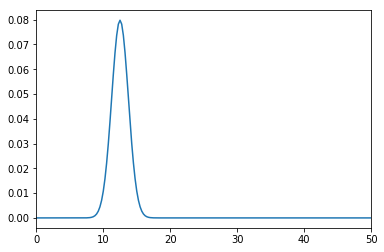

In [8]:
f, a = plt.subplots()
a.plot(waveF, np.abs(waveX))
a.set_xlim([0, 50])
f.show()

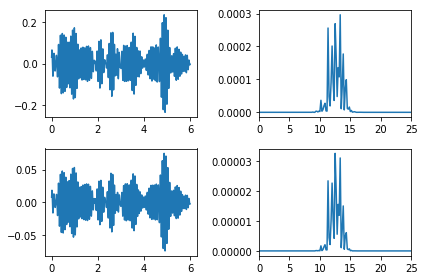

In [10]:
half_kernel = int((len(wavelet) - 1 ) / 2)
n_conv = len(sig) + len(wavelet) + 1

sigX_conv = fft(sig, n_conv)
waveletX_conv = fft(wavelet, n_conv)
waveletX_conv = waveletX_conv / np.max(waveletX_conv)

a_sig = ifft(sigX_conv * waveletX_conv)
a_sig = a_sig[half_kernel + 1:-half_kernel -1]
wave_res = np.real(a_sig)

waveX, waveF = fourier(sig_wavelet, fs)
wave_resX, wave_resF = fourier(wave_res, fs)

f, a = plt.subplots(2, 2)
a[0, 0].plot(t, sig_wavelet)
a[0, 1].plot(waveF, np.abs(waveX)**2)
a[1, 0].plot(t, wave_res)
a[1, 1].plot(wave_resF, np.abs(wave_resX)**2)

a[0, 1].set_xlim([0, 25])
a[1, 1].set_xlim([0, 25])
f.tight_layout()
f.show()

#### FIR filter

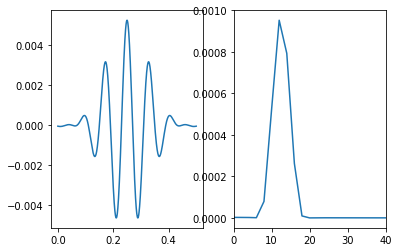

In [20]:
band = [10, 15]
order = 5
numtaps = int(order * (fs / band[0]))
if numtaps % 2 == 0:
    numtaps += 1

kernel = signal.firwin(numtaps=numtaps, cutoff=band, pass_zero=False, fs=fs)
kernel_X, kernel_ff = fourier(kernel, fs)

f, a = plt.subplots(1, 2)
a[0].plot((np.arange(numtaps) / fs), kernel)
a[1].plot(kernel_ff, np.abs(kernel_X))
a[1].set_xlim([0, 40])
f.show()

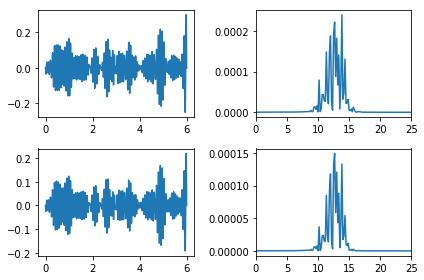

In [23]:
fir_filtered = signal.filtfilt(kernel, 1, sig)
fir_filtered_X, fir_filtered_ff = fourier(fir_filtered, fs)

f, a = plt.subplots(2, 2)
a[0, 0].plot(t, fir)
a[0, 1].plot(firF, np.abs(firX)**2)
a[1, 0].plot(t, fir_filtered)
a[1, 1].plot(fir_filtered_ff, np.abs(fir_filtered_X)**2)

a[0, 1].set_xlim([0, 25])
a[1, 1].set_xlim([0, 25])
f.tight_layout()
f.show()